In [191]:
from skimage import io
import numpy as np
from pandas import DataFrame
from matplotlib import colors
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from collections import Counter


In [218]:
image_url = 'https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1568668356i/49977811.jpg'
photo = io.imread(image_url)

print("Shape is", photo.shape)
print("Size is", photo.size)

Shape is (400, 267, 3)
Size is 320400


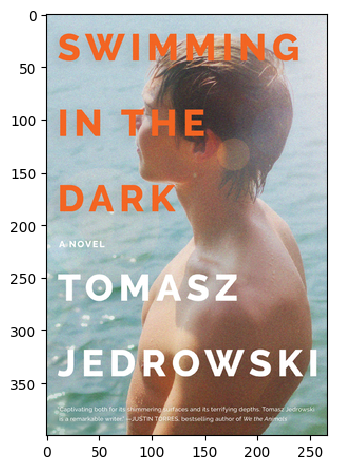

In [219]:
%matplotlib inline
io.imshow(photo)

In [220]:
photo_without_alpha = photo[:,:,:3]
photo = np.array(photo_without_alpha, dtype=np.float64) / 255  # Scale values
w, h, d = original_shape = tuple(photo.shape)  # Get the current shape
image_array = np.reshape(photo, (w * h, d))  # Reshape to to 2D
print(image_array)

[[0.74901961 0.83137255 0.85098039]
 [0.74509804 0.80392157 0.87843137]
 [0.69803922 0.8        0.85098039]
 ...
 [0.45882353 0.59607843 0.50196078]
 [0.4627451  0.59607843 0.49803922]
 [0.41960784 0.61960784 0.49803922]]


In [221]:
pixels = DataFrame(image_array, columns=["Red", "Green", "Blue"])
print(pixels)

             Red     Green      Blue
0       0.749020  0.831373  0.850980
1       0.745098  0.803922  0.878431
2       0.698039  0.800000  0.850980
3       0.721569  0.815686  0.862745
4       0.701961  0.803922  0.862745
...          ...       ...       ...
106795  0.419608  0.639216  0.494118
106796  0.458824  0.615686  0.521569
106797  0.458824  0.596078  0.501961
106798  0.462745  0.596078  0.498039
106799  0.419608  0.619608  0.498039

[106800 rows x 3 columns]


In [222]:
bluest_index = pixels["Blue"].idxmax()
x = bluest_index % w
y = bluest_index // w
x, y

(105, 144)

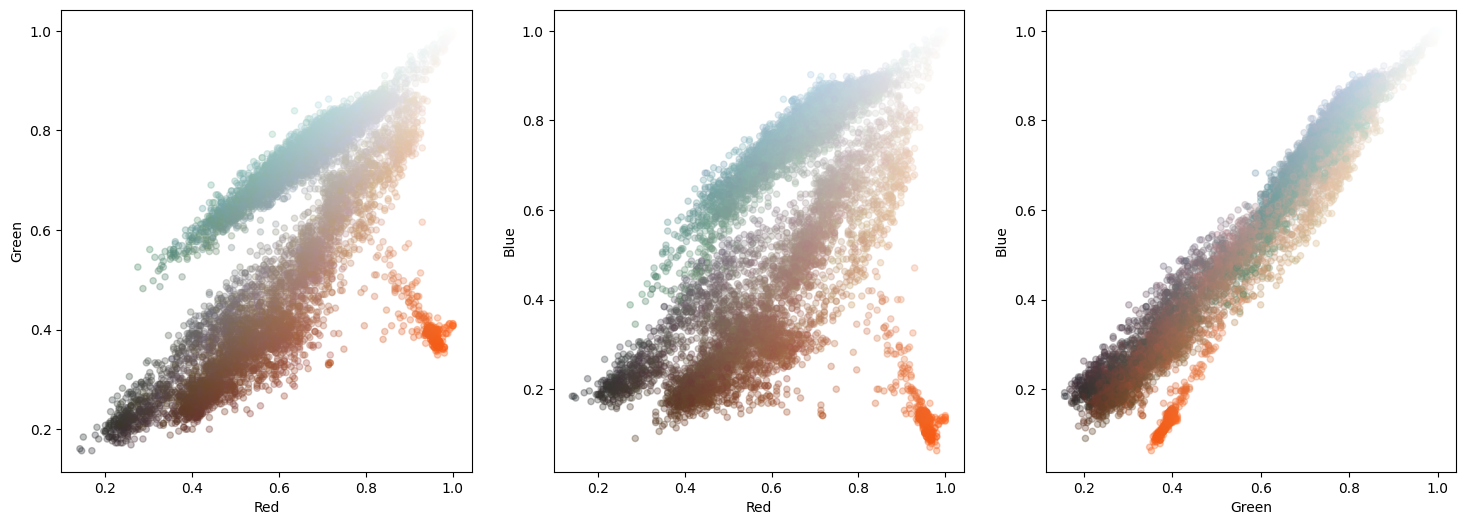

In [223]:
pixels["colour"] = [colors.to_hex(p) for p in image_array] # encoded colour string
pixels_sample = pixels.sample(frac=0.1)

def plot_colours(df, c1, c2, c3):
    """
    Given a DataFrame and three column names,
    plot the pairs against each other
    """
    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(18, 6)
    df.plot.scatter(c1, c2, c=df["colour"], alpha=0.3, ax=ax[0])
    df.plot.scatter(c1, c3, c=df["colour"], alpha=0.3, ax=ax[1])
    df.plot.scatter(c2, c3, c=df["colour"], alpha=0.3, ax=ax[2])


plot_colours(pixels_sample, "Red", "Green", "Blue")

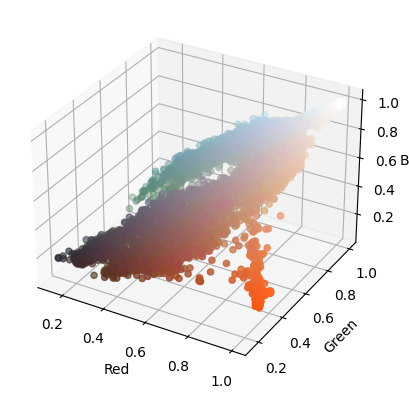

In [224]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
ax.scatter(pixels_sample["Red"], pixels_sample["Green"], pixels_sample["Blue"], c=pixels_sample["colour"])

In [225]:
pixels.corr(numeric_only=True)

,Red,Green,Blue
Red,1.000000,0.651556,0.493143
Green,0.651556,1.000000,0.971126
Blue,0.493143,0.971126,1.000000


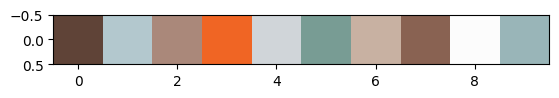

In [226]:
kmeans = KMeans(n_clusters=10).fit(pixels_sample[["Red", "Green", "Blue"]])
plt.imshow([kmeans.cluster_centers_])

In [227]:
labels = kmeans.predict(pixels[["Red", "Green", "Blue"]])
labels

array([4, 1, 1, ..., 5, 5, 5], dtype=int32)

<BarContainer object of 10 artists>

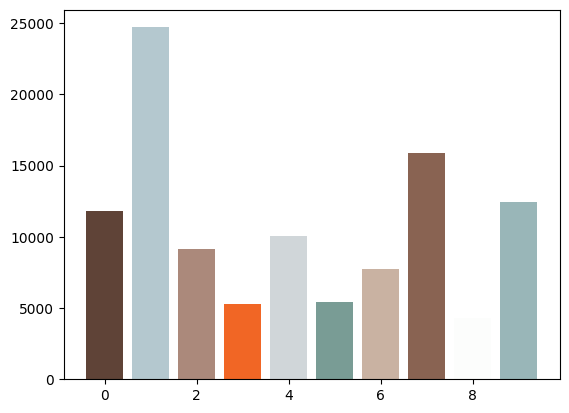

In [228]:
labels_count = Counter(labels)
sorted_labels = dict(sorted(labels_count.items(), key=lambda i: i[0]))
plt.bar(sorted_labels.keys(), sorted_labels.values(), color=kmeans.cluster_centers_)

In [229]:
reduced = np.array([kmeans.cluster_centers_[p] for p in labels]).reshape(original_shape)

Text(0.5, 1.0, 'RGB clustered')

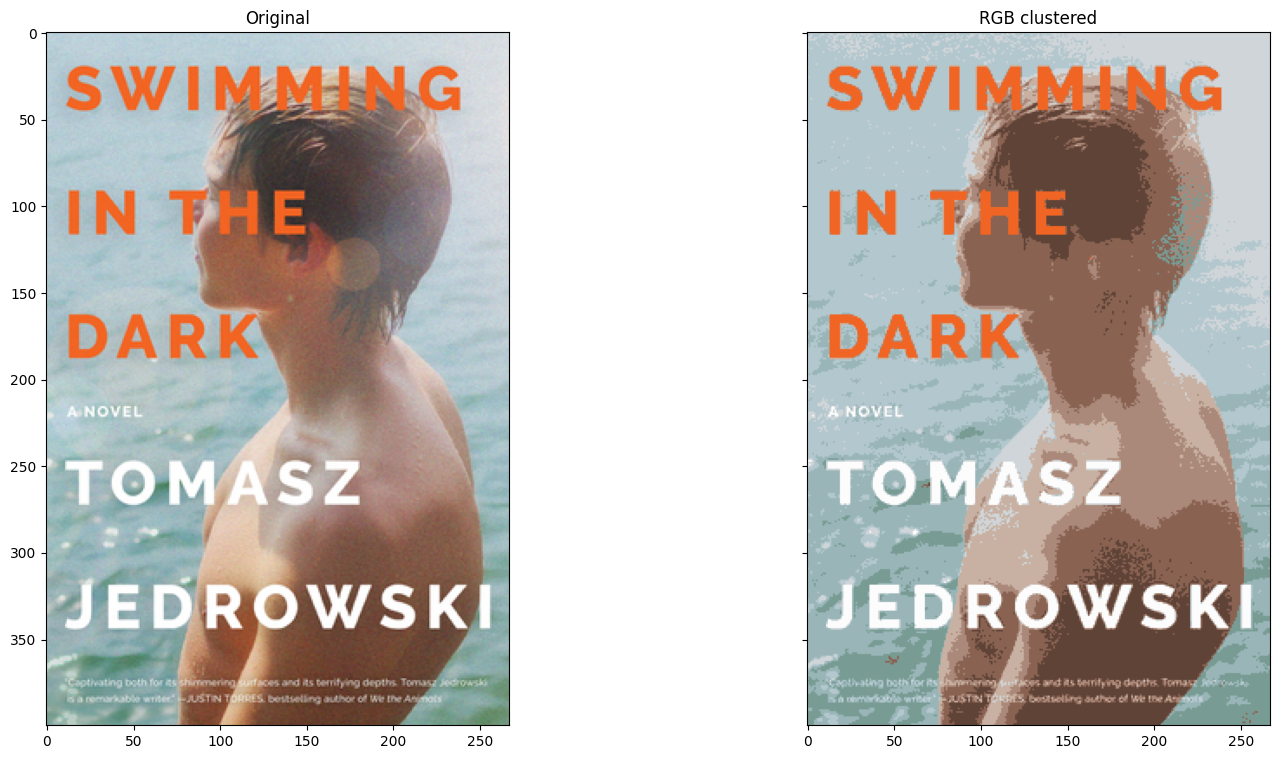

In [230]:
f, axarr = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18, 9))
axarr[0].imshow(photo)
axarr[0].set_title("Original")
axarr[1].imshow(reduced)
axarr[1].set_title("RGB clustered")